# OTT Platforms Analysis

![title](OTT_apps_digital_gold_fever-1-768x425-1.png)

Nowadays, we have many platforms for streaming. \
There are so many contents. So we have to make a good choice what platform has many contents good on us.\
Here is analysis for good choice. And it can recommand you to choose some movies.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

import plotly as py
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Read Data

In [2]:
movie = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv', index_col=0)
movie.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0        1     0            0        0     0               Christopher Nolan   
1        1     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0     0         Anthony Russo,Joe Russo   
3        1     0            0        0     0                 Robert Zemeckis   
4        1     0            1        0     0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0  
2                  English    149.0  
3                  English    116.0  
4                  Italian    161.0

In [3]:
movie.info()  # 16744개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.2+ MB


### Data has many nan-values.

In [4]:
movie.isna().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

### Preprocessing

In [5]:
movie = movie.drop(['ID', 'Type'], axis=1)

In [6]:
movie.update(movie[['Age']].fillna('all'))
movie.update(movie[['Directors', 'Genres', 'Country', 'Language']].fillna('Others'))
movie.update(movie[['Runtime']].fillna(93))
movie.update(movie[['IMDb']].fillna(5.91))
movie.update(movie[['Rotten Tomatoes']].fillna('50%'))  # 200%로 바꿔서 확인하는 방법도 생각해보기
movie

Title  Year  Age  IMDb Rotten Tomatoes  \
0                           Inception  2010  13+  8.80             87%   
1                          The Matrix  1999  18+  8.70             87%   
2              Avengers: Infinity War  2018  13+  8.50             84%   
3                  Back to the Future  1985   7+  8.50             96%   
4      The Good, the Bad and the Ugly  1966  18+  8.80             97%   
...                               ...   ...  ...   ...             ...   
16739       The Ghosts of Buxley Hall  1980  all  6.20             50%   
16740                  The Poof Point  2001   7+  4.70             50%   
16741           Sharks of Lost Island  2013  all  5.70             50%   
16742              Man Among Cheetahs  2017  all  6.60             50%   
16743                In Beaver Valley  1950  all  5.91             50%   

       Netflix  Hulu  Prime Video  Disney+                       Directors  \
0            1     0            0        0               Christopher Nolan   
1            1     0            0        0  Lana Wachowski,Lilly Wachowski   
2            1     0            0        0         Anthony Russo,Joe Russo   
3            1     0            0        0                 Robert Zemeckis   
4            1     0            1        0                    Sergio Leone   
...        ...   ...          ...      ...                             ...   
16739        0     0            0        1                    Bruce Bilson   
16740        0     0            0        1                     Neal Israel   
16741        0     0            0        1                    Neil Gelinas   
16742        0     0            0        1            Richard Slater-Jones   
16743        0     0            0        1                     James Algar   

                                 Genres                       Country  \
0      Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                         Action,Sci-Fi                 United States   
2               Action,Adventure,Sci-Fi                 United States   
3               Adventure,Comedy,Sci-Fi                 United States   
4                               Western      Italy,Spain,West Germany   
...                                 ...                           ...   
16739      Comedy,Family,Fantasy,Horror                 United States   
16740              Comedy,Family,Sci-Fi                 United States   
16741                       Documentary                 United States   
16742                       Documentary                 United States   
16743          Documentary,Short,Family                 United States   

                      Language  Runtime  
0      English,Japanese,French    148.0  
1                      English    136.0  
2                      English    149.0  
3                      English    116.0  
4                      Italian    161.0  
...                        ...      ...  
16739                  English    120.0  
16740                  English     90.0  
16741                  English     93.0  
16742                  English     93.0  
16743                  English     32.0  

[16744 rows x 14 columns]

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              16744 non-null  object 
 3   IMDb             16744 non-null  float64
 4   Rotten Tomatoes  16744 non-null  object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Directors        16744 non-null  object 
 10  Genres           16744 non-null  object 
 11  Country          16744 non-null  object 
 12  Language         16744 non-null  object 
 13  Runtime          16744 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.9+ MB


# Visualization on Genres

In [11]:
seperated_genres = movie['Genres'].str.get_dummies(',')
seperated_genres

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0           1          1          0          0       0      0            0   
1           1          0          0          0       0      0            0   
2           1          1          0          0       0      0            0   
3           0          1          0          0       1      0            0   
4           0          0          0          0       0      0            0   
...       ...        ...        ...        ...     ...    ...          ...   
16739       0          0          0          0       1      0            0   
16740       0          0          0          0       1      0            0   
16741       0          0          0          0       0      0            1   
16742       0          0          0          0       0      0            1   
16743       0          0          0          0       0      0            1   

       Drama  Family  Fantasy  ...  Others  Reality-TV  Romance  Sci-Fi  \
0          0       0        0  ...       0           0        0       1   
1          0       0        0  ...       0           0        0       1   
2          0       0        0  ...       0           0        0       1   
3          0       0        0  ...       0           0        0       1   
4          0       0        0  ...       0           0        0       0   
...      ...     ...      ...  ...     ...         ...      ...     ...   
16739      0       1        1  ...       0           0        0       0   
16740      0       1        0  ...       0           0        0       1   
16741      0       0        0  ...       0           0        0       0   
16742      0       0        0  ...       0           0        0       0   
16743      0       1        0  ...       0           0        0       0   

       Short  Sport  Talk-Show  Thriller  War  Western  
0          0      0          0         1    0        0  
1          0      0          0         0    0        0  
2          0      0          0         0    0        0  
3          0      0          0         0    0        0  
4          0      0          0         0    0        1  
...      ...    ...        ...       ...  ...      ...  
16739      0      0          0         0    0        0  
16740      0      0          0         0    0        0  
16741      0      0          0         0    0        0  
16742      0      0          0         0    0        0  
16743      1      0          0         0    0        0  

[16744 rows x 28 columns]

In [12]:
genres_count = seperated_genres.sum()
genres_count

Action         2683
Adventure      1778
Animation       711
Biography       821
Comedy         4637
Crime          1833
Documentary    2546
Drama          7227
Family         1514
Fantasy        1089
Film-Noir        79
Game-Show         7
History         715
Horror         2201
Music           667
Musical         401
Mystery        1274
News            105
Others          275
Reality-TV       22
Romance        2359
Sci-Fi         1228
Short           386
Sport           404
Talk-Show        19
Thriller       3354
War             539
Western         499
dtype: int64

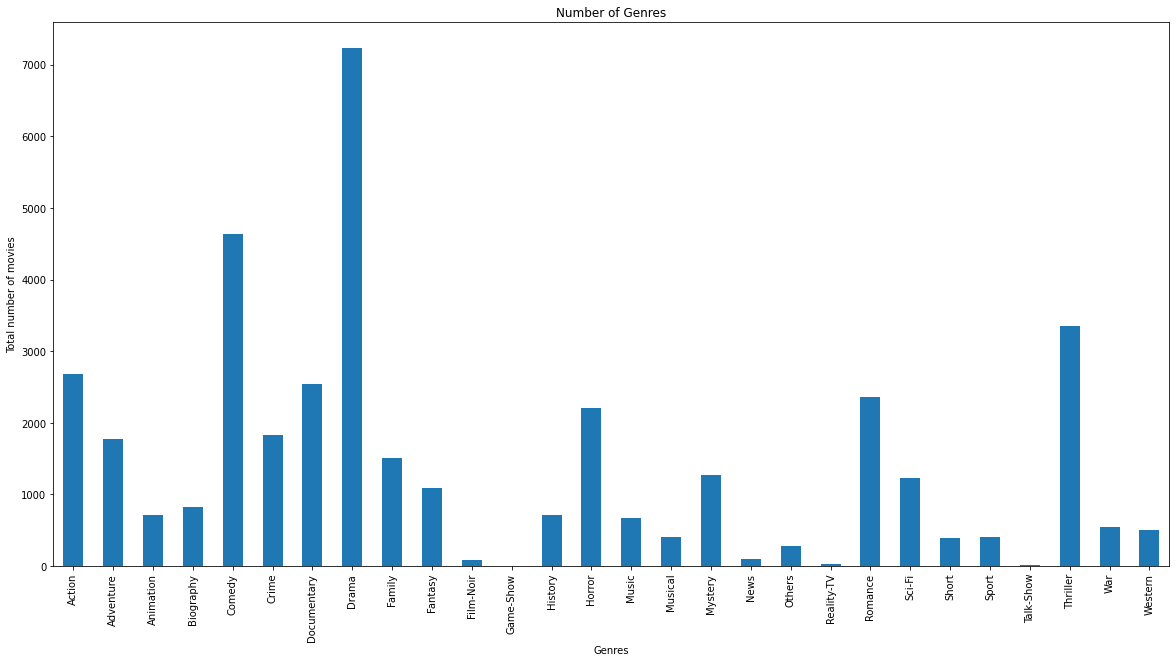

In [13]:
plt.figure(figsize = (20, 10))
genres_count.plot(kind="bar")
plt.ylabel('Total number of movies')
plt.xlabel('Genres')
plt.title('Number of Genres')
plt.show()

# Visualization on OTT Platforms

In [14]:
netflix_count = movie['Netflix'][movie['Netflix'] == 1].count()
hulu_count = movie['Hulu'][movie['Hulu'] == 1].count()
amazon_count = movie['Prime Video'][movie['Prime Video'] == 1].count()
disney_count = movie['Disney+'][movie['Disney+'] == 1].count()
count_list = [netflix_count, hulu_count, amazon_count, disney_count]

labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
count_series = pd.Series(count_list, index = labels)
count_series

Netflix         3560
Hulu             903
Prime Video    12354
Disney+          564
dtype: int64

In [15]:
fig = go.Figure(data=[go.Pie(labels=labels, values=count_series, hole=.4)])
fig.update_layout(title_text = 'Number of movies in platforms')
fig.show()

# IMDb Ratings

In [16]:
movie.sort_values(by = 'IMDb', ascending=False).head()

Title  Year  Age  IMDb  \
6566                                         Square One  2019  all   9.3   
1292  My Next Guest with David Letterman and Shah Ru...  2019  all   9.3   
6837            Steven Banks: Home Entertainment Center  1989  all   9.3   
7426                                             Bounty  2011  all   9.3   
7220                                 Down, But Not Out!  2015  all   9.3   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+         Directors  \
6566              50        0     0            1        0          Danny Wu   
1292              50        1     0            0        0            Others   
6837              50        0     0            1        0    Tom McLoughlin   
7426              50        0     0            1        0   Roger Donaldson   
7220              50        0     0            1        0  Miguel Gaudêncio   

                               Genres  \
6566          Documentary,Drama,Music   
1292                        Talk-Show   
6837                           Comedy   
7426  Adventure,Drama,History,Romance   
7220                Documentary,Sport   

                                       Country Language  Runtime  
6566                             United States  English     83.0  
1292                                    Others   Others     61.0  
6837                             United States  English     60.0  
7426  United Kingdom,United States,New Zealand  English    132.0  
7220                                    Poland   Polish     68.0

In [17]:
imdb_rating_series = np.round(movie['IMDb'], 0)
imdb_rating_series.value_counts().sort_index()

0.0       4
1.0       7
2.0     241
3.0     660
4.0    1678
5.0    2758
6.0    5744
7.0    3965
8.0    1590
9.0      97
Name: IMDb, dtype: int64

In [18]:
index = list(range(10))
fig = px.bar(x=index, y=imdb_rating_series.value_counts().sort_index(), height = 400, color = index, 
            labels = { 'x' : 'IMDB rating', 'y' : 'Number of movies'})
fig.show()

# Rotten Tomatoes Ratings

In [19]:
movie.sort_values(by = 'Rotten Tomatoes', ascending=False).head()

Title  Year  Age  IMDb Rotten Tomatoes  Netflix  Hulu  \
4474           Eighth Grade  2018  18+   7.4              99        0     0   
16220          Finding Nemo  2003  all   8.1              99        0     0   
4854       Rivers and Tides  2001  all   7.9              99        0     0   
142              Starred Up  2013  18+   7.4              99        1     0   
262    20 Feet from Stardom  2013  13+   7.4              99        1     0   

       Prime Video  Disney+                   Directors  \
4474             1        0                  Bo Burnham   
16220            0        1  Andrew Stanton,Lee Unkrich   
4854             1        0        Thomas Riedelsheimer   
142              1        0             David Mackenzie   
262              0        0              Morgan Neville   

                                  Genres  \
4474                        Comedy,Drama   
16220  Animation,Adventure,Comedy,Family   
4854                         Documentary   
142                          Crime,Drama   
262          Documentary,Biography,Music   

                                     Country         Language  Runtime  
4474                           United States          English     93.0  
16220                United States,Australia          English    100.0  
4854   Germany,Finland,United Kingdom,Canada          English     90.0  
142                           United Kingdom          English    106.0  
262                            United States  English,Spanish     91.0

In [30]:
tomato_rating_series = movie['Rotten Tomatoes']
tomato_rating_series = tomato_rating_series.str.replace(pat=r'[^\w]', repl=r'', regex=True)
tomato_rating_series = pd.to_numeric(tomato_rating_series)
tomato_rating_series = np.round(tomato_rating_series, -1)

In [33]:
tomato_rating_series.value_counts().sort_index()

0         27
10       187
20       368
30       290
40       483
50     11910
60       556
70       499
80       895
90       849
100      680
Name: Rotten Tomatoes, dtype: int64

In [38]:
index = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fig = px.bar(x=index, y=tomato_rating_series.value_counts().sort_index(), height = 400, color = index, 
            labels = { 'x' : 'Rotten Tomatoes rating', 'y' : 'Number of movies'})
fig.show()

We can see Rating 5 is the highest number. But we added '50%' to nan-values.\
So this result shows the highest number is 50.\
We can check new Visulization on Rotten Tomatoes without '50%'.

In [48]:
without_50 = tomato_rating_series.value_counts().sort_index()
without_50.drop(50, inplace=True)
without_50

0       27
10     187
20     368
30     290
40     483
60     556
70     499
80     895
90     849
100    680
Name: Rotten Tomatoes, dtype: int64

In [49]:
index = [0, 10, 20, 30, 40, 60, 70, 80, 90, 100]
fig = px.bar(x=index, y=without_50, height = 400, color = index, 
            labels = { 'x' : 'Rotten Tomatoes rating', 'y' : 'Number of movies'})
fig.show()

### We can find that Every movies don't have same ratings between 2 sites.

# Sorting by IMDb ratings and Find top 20 movies on each platforms
- We use IMDb only. Because Rotten Tomatoes have a lot '50%' datas. It can make some troubles for analysis.

## Netflix

In [62]:
sorted_by_imdb = movie.sort_values(by = 'IMDb', ascending=False)
netflix_imdb = sorted_by_imdb[sorted_by_imdb['Netflix'] == 1]  # Movies on the 'Netflix'.
netflix_imdb.head()

Title  Year  Age  IMDb  \
1292  My Next Guest with David Letterman and Shah Ru...  2019  all   9.3   
947                                           Natsamrat  2016  all   9.1   
0                                             Inception  2010  13+   8.8   
4                        The Good, the Bad and the Ugly  1966  18+   8.8   
1214                             Bill Hicks: Relentless  1992  all   8.7   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+          Directors  \
1292              50        1     0            0        0             Others   
947               50        1     0            0        0   Mahesh Manjrekar   
0                 87        1     0            0        0  Christopher Nolan   
4                 97        1     0            1        0       Sergio Leone   
1214              50        1     0            0        0        Chris Bould   

                                Genres                       Country  \
1292                         Talk-Show                        Others   
947                       Drama,Family                         India   
0     Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
4                              Western      Italy,Spain,West Germany   
1214                Documentary,Comedy                United Kingdom   

                     Language  Runtime  
1292                   Others     61.0  
947                   Marathi    166.0  
0     English,Japanese,French    148.0  
4                     Italian    161.0  
1214                  English     61.0

In [66]:
fig = px.sunburst(netflix_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()

## Hulu

In [68]:
hulu_imdb = sorted_by_imdb[sorted_by_imdb['Hulu'] == 1]  # Movies on the 'Hulu'.
hulu_imdb.head()

Title  Year  Age  IMDb Rotten Tomatoes  \
3560                   The Dark Knight  2008  13+   9.0              94   
3561                        GoodFellas  1990  18+   8.7              96   
3564                    The Green Mile  1999  18+   8.6              78   
3562                          Parasite  2019  18+   8.6              99   
4283  Brad Paisley Thinks He's Special  2019  all   8.5              50   

      Netflix  Hulu  Prime Video  Disney+          Directors  \
3560        0     1            0        0  Christopher Nolan   
3561        0     1            0        0    Martin Scorsese   
3564        0     1            0        0     Frank Darabont   
3562        0     1            1        0       Bong Joon Ho   
4283        0     1            0        0             Others   

                           Genres                       Country  \
3560  Action,Crime,Drama,Thriller  United States,United Kingdom   
3561        Biography,Crime,Drama                 United States   
3564  Crime,Drama,Fantasy,Mystery                 United States   
3562        Comedy,Drama,Thriller                   South Korea   
4283                        Music                 United States   

              Language  Runtime  
3560  English,Mandarin    152.0  
3561   English,Italian    146.0  
3564    English,French    189.0  
3562    Korean,English    132.0  
4283            Others     93.0

In [69]:
fig = px.sunburst(hulu_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()

## Prime Video

In [70]:
amazon_imdb = sorted_by_imdb[sorted_by_imdb['Prime Video'] == 1]  # Movies on the 'Prime Video'.
amazon_imdb.head()

Title  Year  Age  IMDb  \
6566                               Square One  2019  all   9.3   
6837  Steven Banks: Home Entertainment Center  1989  all   9.3   
7426                                   Bounty  2011  all   9.3   
7220                       Down, But Not Out!  2015  all   9.3   
5110                          Love on a Leash  2011  all   9.3   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+         Directors  \
6566              50        0     0            1        0          Danny Wu   
6837              50        0     0            1        0    Tom McLoughlin   
7426              50        0     0            1        0   Roger Donaldson   
7220              50        0     0            1        0  Miguel Gaudêncio   
5110              50        0     0            1        0          Fen Tian   

                               Genres  \
6566          Documentary,Drama,Music   
6837                           Comedy   
7426  Adventure,Drama,History,Romance   
7220                Documentary,Sport   
5110     Comedy,Drama,Fantasy,Romance   

                                       Country Language  Runtime  
6566                             United States  English     83.0  
6837                             United States  English     60.0  
7426  United Kingdom,United States,New Zealand  English    132.0  
7220                                    Poland   Polish     68.0  
5110                             United States   Others     90.0

In [71]:
fig = px.sunburst(amazon_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()

## Disney+

In [72]:
disney_imdb = sorted_by_imdb[sorted_by_imdb['Disney+'] == 1]  # Movies on the 'Disney+'.
disney_imdb.head()

Title  Year  Age  IMDb Rotten Tomatoes  \
16213  Star Wars: The Empire Strikes Back  1980   7+   8.7              94   
16212               Star Wars: A New Hope  1977   7+   8.6              92   
16214                       The Lion King  1994  all   8.5              93   
16441       Newsies: The Broadway Musical  2017  13+   8.5              50   
16216                   Avengers: Endgame  2019  13+   8.4              93   

       Netflix  Hulu  Prime Video  Disney+                    Directors  \
16213        0     0            0        1               Irvin Kershner   
16212        0     0            0        1                 George Lucas   
16214        0     0            0        1                  Jon Favreau   
16441        0     0            0        1  Jeff Calhoun,Brett Sullivan   
16216        0     0            0        1      Anthony Russo,Joe Russo   

                                         Genres                       Country  \
16213           Action,Adventure,Fantasy,Sci-Fi                 United States   
16212           Action,Adventure,Fantasy,Sci-Fi                 United States   
16214  Animation,Adventure,Drama,Family,Musical  United States,United Kingdom   
16441                                   Musical                 United States   
16216             Action,Adventure,Drama,Sci-Fi                 United States   

                                Language  Runtime  
16213                            English    124.0  
16212                            English    121.0  
16214  English,Xhosa,Zulu,French,Spanish    118.0  
16441                            English    149.0  
16216      English,Japanese,Xhosa,German    181.0

In [73]:
fig = px.sunburst(disney_imdb.head(20), 
                  path = ['Genres', 'Title'],
                  values = 'IMDb', color = 'IMDb',
                  color_continuous_scale='twilight')
fig.show()

# Top 20 Runnig Time Movies

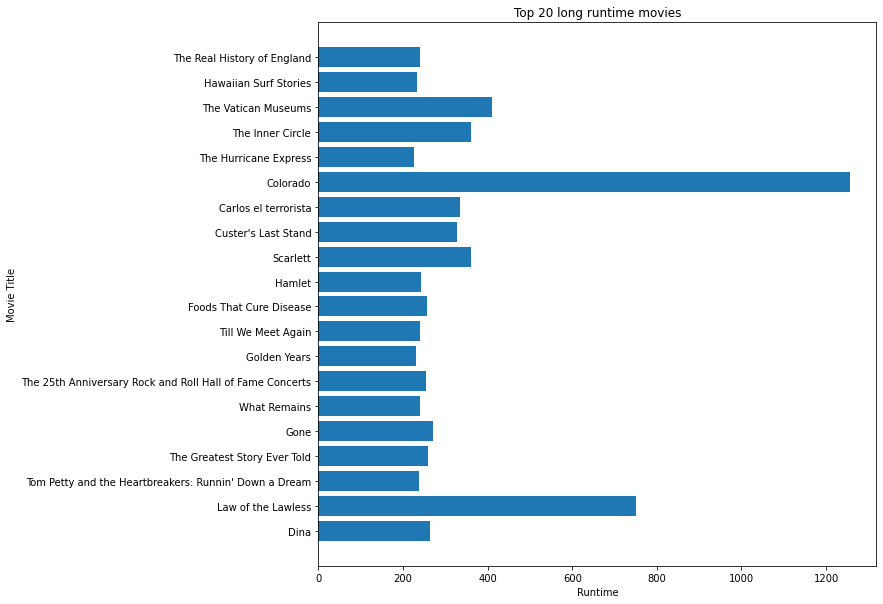

In [127]:
runtime = movie['Runtime'].sort_values(ascending=False).head(20)

x = movie[movie['Runtime'].isin(runtime)]['Title']
y = runtime.sort_index()

plt.figure(figsize=(10,10))
plt.barh(x, y)
plt.title('Top 20 long runtime movies')
plt.xlabel('Runtime')
plt.ylabel('Movie Title')
plt.show()

# Percentage of movie's released year

In [128]:
# 년도별 영화수
values = year_movie.value_counts().sort_index()

fig = go.Figure(data=[go.Pie(labels=['1950~1990','1990~2000','2000~2010','2010~2020'], values=values, hole=.4)])
fig.update_layout(title_text = '1950 to 2020 total number of movie')
fig.show()

# Number of movies by each countries

In [112]:
top_20 = movie.groupby('Country')['Title'].count().reset_index().rename(columns = {'Title':'Number_of_Movies'})
top_20 = top_20.sort_values('Number_of_Movies',ascending = False).head(20)
fig = px.bar(top_20, x='Country', y='Number_of_Movies', color='Number_of_Movies', height=700,
            title = 'Total number of movies based on country')
fig.show()

# Number of movies in Genre by each platforms

In [131]:
genre_merged = pd.concat([movie, seperated_genres], axis = 1, sort = False)

In [133]:
def bar(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    val_counts = dataframe.iloc[:,15:].sum(axis=0).sort_values(ascending=False)
    val_counts2 = pd.DataFrame(val_counts,columns=['Number of movies'])
    return val_counts2[0:20].style.bar(subset=["Number of movies",], color=c)

In [134]:
bar(genre_merged, 'Netflix', 'red')

In [135]:
bar(genre_merged, 'Hulu','#AB63FA')

In [136]:
bar(genre_merged, 'Prime Video','#00CC96')

In [137]:
bar(genre_merged, 'Disney+','#B6E880')